In [19]:
import pandas as pd
import tiktoken
import seaborn as sns

import matplotlib.pyplot as plt

In [5]:
def num_tokens_from_string(string: str, encoding_name: str = "cl100k_base") -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [2]:
df = pd.read_parquet("data/speeches/speeches_sotu.parquet")

In [7]:
df["num_tokens"] = df["Transcript"].apply(lambda x: num_tokens_from_string(x))

/tmp/ipykernel_8026/1628199408.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="num_tokens", palette="deep").set(


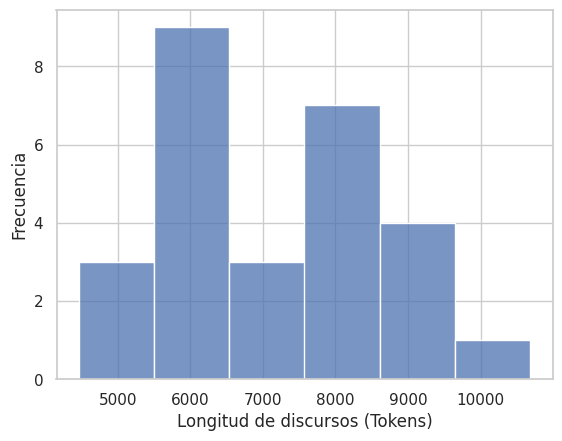

In [20]:
sns.set_theme(style="whitegrid", palette="deep")

sns.histplot(data=df, x="num_tokens", palette="deep").set(
    xlabel="Longitud de discursos (Tokens)", 
    ylabel="Frecuencia"
)
plt.savefig("distribucion_tokens.png")

In [21]:
df["num_tokens"].describe()

count       27.000000
mean      7134.333333
std       1526.582281
min       4467.000000
25%       6129.000000
50%       7135.000000
75%       8268.500000
max      10679.000000
Name: num_tokens, dtype: float64